In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
#reading the Excel file data into a DataFrame object
df = pd.read_excel("/content/Population Dynamics (World Development Report).xls")
df

,Unnamed: 0,Population,Unnamed: 2,Average annual population growth %,Population age composition,Unnamed: 5,Unnamed: 6,Dependency ratio,Unnamed: 8,Crude death rate,Crude birth rate
0,NaN,NaN,NaN,NaN,Ages 0-14,Ages 15-64,Ages 65+,young,old,NaN,NaN
1,NaN,millions,NaN,NaN,%,%,%,% of working-age population,% of working-age population,"per 1,000 people","per 1,000 people"
2,NaN,2000,2017,2000-2017,2017,2017,2017,2017,2017,2016,2016
3,Afghanistan,20.1,35.5,3.4,43,54,3,80,5,7,33
4,Albania,3.1,2.9,-0.4,17,69,13,25,19,7,12
...,...,...,...,...,...,...,...,...,...,...,...
295,Source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,(1) United Nations Population Division. World ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          274 non-null    object
 1   Population                          228 non-null    object
 2   Unnamed: 2                          227 non-null    object
 3   Average annual population growth %  227 non-null    object
 4   Population age composition          229 non-null    object
 5   Unnamed: 5                          229 non-null    object
 6   Unnamed: 6                          229 non-null    object
 7   Dependency ratio                    229 non-null    object
 8   Unnamed: 8                          229 non-null    object
 9   Crude death rate                    228 non-null    object
 10  Crude birth rate                    228 non-null    object
dtypes: object(11)
memory usage: 25.9+ KB


In [67]:
print(df.columns)

Index(['Unnamed: 0', 'Population', 'Unnamed: 2',
       'Average annual population growth %', 'Population age composition',
       'Unnamed: 5', 'Unnamed: 6', 'Dependency ratio', 'Unnamed: 8',
       'Crude death rate', 'Crude birth rate'],
      dtype='object')


In [68]:
# changing the column header
df.rename(columns={'Unnamed: 5': 'Population age composition2', 'Unnamed: 6': 'Population age composition3'}, inplace=True)

In [69]:
# printing unique values
print(df['Population age composition'].unique())
print(df['Population age composition2'].unique())
print(df['Population age composition3'].unique())

['Ages 0-14' '%' 2017 43 17 29 '..' 47 24 25 20 18 19 14 23 28 31 27 32 22
 45 30 16 15 11 13 40 46 42 33 37 41 36 39 26 35 21 44 48 50 nan]
['Ages 15-64' '%' 2017 54 69 65 '..' 51 64 67 71 78 66 68 62 70 72 52 53
 50 77 57 55 61 60 56 58 63 73 47 76 85 59 nan]
['Ages 65+' '%' 2017 3 13 6 '..' 2 7 11 16 19 9 5 15 4 17 21 18 10 8 20 14
 12 23 27 22 1 nan]


In [70]:
# Converting columns to numeric data types
df['Population age composition'] = pd.to_numeric(df['Population age composition'], errors='coerce')
df['Population age composition2'] = pd.to_numeric(df['Population age composition2'], errors='coerce')
df['Population age composition3'] = pd.to_numeric(df['Population age composition3'], errors='coerce')

In [71]:
# Replacing missing age values with the median age of the population
median_age1 = df['Population age composition'].median()
median_age2 = df['Population age composition2'].median()
median_age3 = df['Population age composition3'].median()


In [72]:
df['Population age composition'].fillna(median_age1, inplace=True)
df['Population age composition2'].fillna(median_age2, inplace=True)
df['Population age composition3'].fillna(median_age3, inplace=True)

In [73]:
# Define age categories
Categories_age = ['0-14', '15-64', '65+']

In [74]:
df_grouped = df[['Population age composition', 'Population age composition2', 'Population age composition3']].copy()
df_grouped.columns = Categories_age

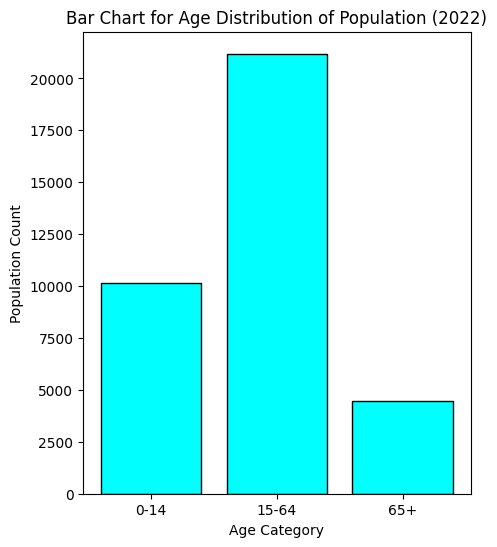

In [75]:
# Calculate the sum of each age category
Total_population = df_grouped.sum()
# Creating a bar chart for age distribution
plt.figure(figsize=(5,6))
plt.bar(Categories_age, Total_population, color = 'cyan', edgecolor = 'black')
plt.xlabel('Age Category')
plt.ylabel('Population Count')
plt.title('Bar Chart for Age Distribution of Population (2022)')
plt.show()